# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('trainicr.csv')
test = pd.read_csv('testicr.csv')

In [3]:
teste = pd.read_csv('testicr.csv')

In [4]:
encoder = LabelEncoder()
train['Id'] = encoder.fit_transform(train['Id']).astype(float)
test['Id'] = encoder.fit_transform(test['Id']).astype(float)

train['EJ'] = encoder.fit_transform(train['EJ']).astype(float)
test['EJ'] = encoder.fit_transform(test['EJ']).astype(float)

In [5]:
train.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [6]:
train['BQ'].fillna(train['BQ'].mean(), inplace=True)
train['CB'].fillna(train['CB'].mean(), inplace=True)
train['CC'].fillna(train['CC'].mean(), inplace=True)
train['DU'].fillna(train['DU'].mean(), inplace=True)
train['EL'].fillna(train['BQ'].mean(), inplace=True)
train['FC'].fillna(train['FC'].mean(), inplace=True)
train['FL'].fillna(train['FL'].mean(), inplace=True)
train['FS'].fillna(train['FS'].mean(), inplace=True)
train['GL'].fillna(train['GL'].mean(), inplace=True)
train.isna().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [7]:
X = train.drop(columns='Class')
y = train.Class

In [8]:
X = np.log1p(X)

In [9]:
y.isna().sum()

0

In [10]:
# 509 pessoas não tem nenhuma das três condições médicas avaliadas.
# 108 pessoas tem 1 ou mais condições médicas avaliadas.
# Feature desbalanceada.

np.bincount(y)

array([509, 108], dtype=int64)

In [11]:
X.shape

(617, 57)

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [13]:
# Feature igualada

np.bincount(y_over)

array([509, 509], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.934640522875817

In [16]:
reg_pred = reg.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

def plot_matrix(confusion, name, color_map):
    plt.figure(figsize = (7,6))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels,vmax=20,annot_kws={"size": 15}, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    ax.yaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [18]:
reg_matrix = confusion_matrix(y_true = y_test, y_pred = reg_pred)

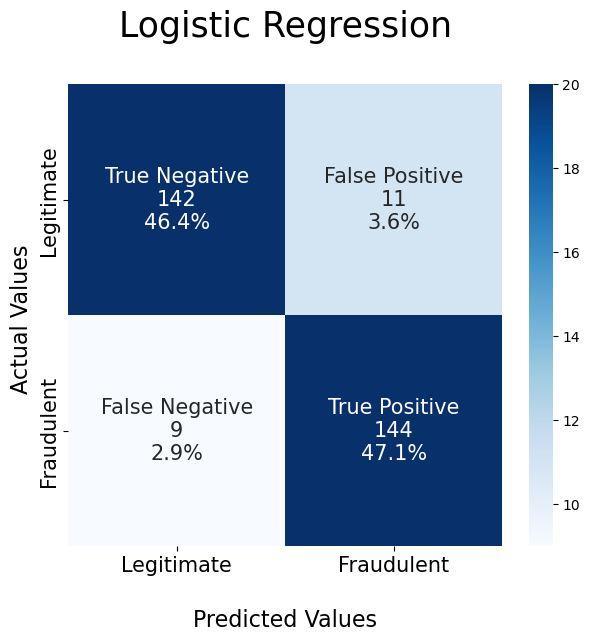

In [19]:
plot_matrix(reg_matrix,'Logistic Regression','Blues')

# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, max_depth=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
rf_matrix = confusion_matrix(y_true = y_test, y_pred = rfc_pred)

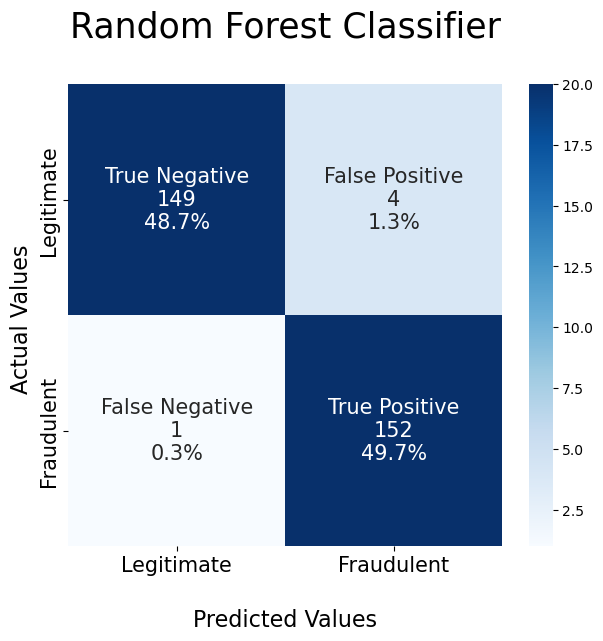

In [23]:
plot_matrix(rf_matrix,'Random Forest Classifier','Blues')

# XGBClassifier

In [24]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier(n_estimators=150, max_depth=7, colsample_bytree=0.4, booster='dart')

xgb_class.fit(X_train, y_train)

xgb_class_pred = xgb_class.predict(X_test)

accuracy = accuracy_score(y_test, xgb_class_pred)

precision = precision_score(y_test, xgb_class_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9771241830065359
Precision: 0.9620253164556962


In [25]:
xgb_matrix = confusion_matrix(y_true = y_test, y_pred = xgb_class_pred)

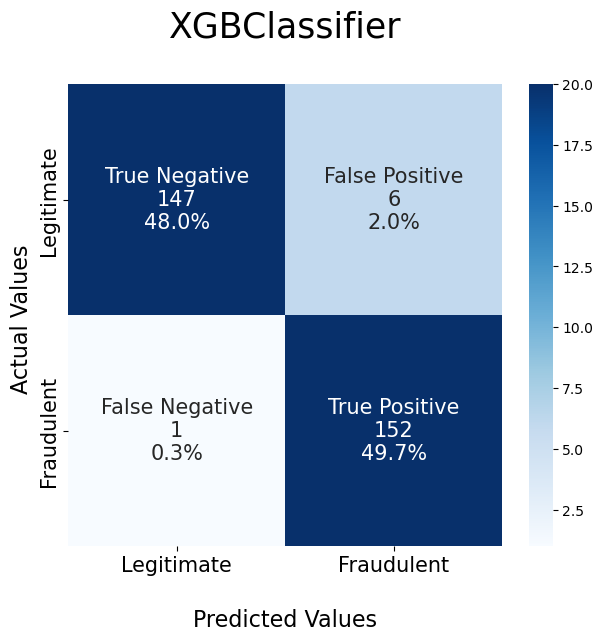

In [26]:
plot_matrix(xgb_matrix,'XGBClassifier','Blues')

# SVM

In [27]:
from sklearn.svm import SVC

svc = SVC(C=1, kernel='linear').fit(X_train, y_train)

In [28]:
svc_predict = svc.predict(X_test)

In [29]:
svc_matrix = confusion_matrix(y_true = y_test, y_pred = svc_predict)

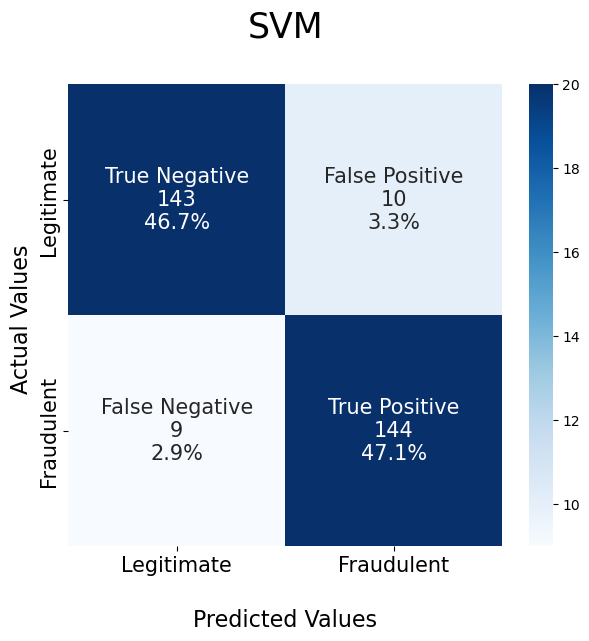

In [30]:
plot_matrix(svc_matrix,'SVM','Blues')

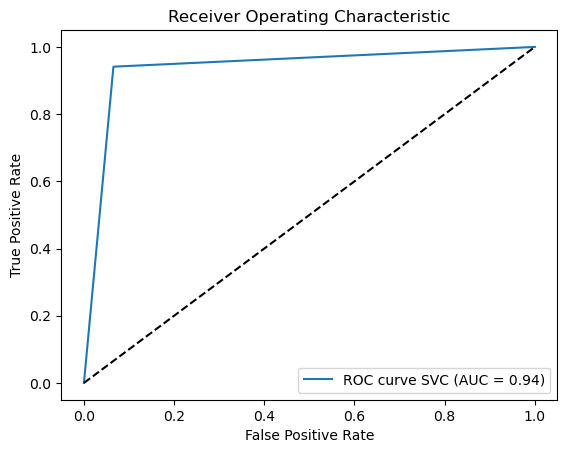

In [31]:
from sklearn.metrics import roc_curve, auc

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_predict)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Deep Learning LSTM

In [32]:
# Deep learning LSTM(Long Short Term Memory).
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=10, activation='tanh', input_shape=(57,1)))
deepLSTM.add(layers.Dense(3, activation="linear"))
deepLSTM.add(layers.Dense(1, activation="sigmoid"))

deepLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision'])

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/1000
45/45 [==============================] - 4s 31ms/step - loss: 0.7017 - precision: 0.4679 - val_loss: 0.6933 - val_precision: 0.5000
Epoch 2/1000
45/45 [==============================] - 1s 16ms/step - loss: 0.6918 - precision: 0.4968 - val_loss: 0.6863 - val_precision: 0.8219
Epoch 3/1000
45/45 [==============================] - 1s 16ms/step - loss: 0.6899 - precision: 0.5226 - val_loss: 0.6824 - val_precision: 0.5879
Epoch 4/1000
45/45 [==============================] - 1s 16ms/step - loss: 0.6874 - precision: 0.5392 - val_loss: 0.6795 - val_precision: 0.8800
Epoch 5/1000
45/45 [==============================] - 1s 17ms/step - loss: 0.6827 - precision: 0.5520 - val_loss: 0.6882 - val_precision: 0.5000
Epoch 6/1000
45/45 [==============================] - 1s 17ms/step - loss: 0.6881 - precision: 0.5262 - val_loss: 0.6757 - val_precision: 0.5865
Epoch 7/1000
45/45 [==============================] - 1s 18ms/step - loss: 0.6819 - precision: 0.5463 - val_loss: 0.6673 - val_pre

45/45 [==============================] - 1s 15ms/step - loss: 0.4842 - precision: 0.7686 - val_loss: 0.4173 - val_precision: 0.7869
Epoch 58/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.4753 - precision: 0.7760 - val_loss: 0.4170 - val_precision: 0.8686
Epoch 59/1000
45/45 [==============================] - 1s 14ms/step - loss: 0.4885 - precision: 0.7690 - val_loss: 0.3951 - val_precision: 0.8387
Epoch 60/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.4531 - precision: 0.8061 - val_loss: 0.3926 - val_precision: 0.7931
Epoch 61/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.5075 - precision: 0.7486 - val_loss: 0.5252 - val_precision: 0.6514
Epoch 62/1000
45/45 [==============================] - 1s 14ms/step - loss: 0.5087 - precision: 0.7659 - val_loss: 0.4280 - val_precision: 0.7552
Epoch 63/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.4962 - precision: 0.7632 - val_loss: 0.4024 - val_precision:

45/45 [==============================] - 1s 16ms/step - loss: 0.3712 - precision: 0.8455 - val_loss: 0.3133 - val_precision: 0.8364
Epoch 114/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3719 - precision: 0.8411 - val_loss: 0.3299 - val_precision: 0.8258
Epoch 115/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3741 - precision: 0.8370 - val_loss: 0.3036 - val_precision: 0.8571
Epoch 116/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3706 - precision: 0.8389 - val_loss: 0.3304 - val_precision: 0.8684
Epoch 117/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3645 - precision: 0.8591 - val_loss: 0.3105 - val_precision: 0.8625
Epoch 118/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3557 - precision: 0.8592 - val_loss: 0.3223 - val_precision: 0.8693
Epoch 119/1000
45/45 [==============================] - 1s 15ms/step - loss: 0.3594 - precision: 0.8511 - val_loss: 0.3177 - val_prec

In [33]:
deep_pred = deepLSTM.predict(X_test)

10/10 [==============================] - 0s 4ms/step


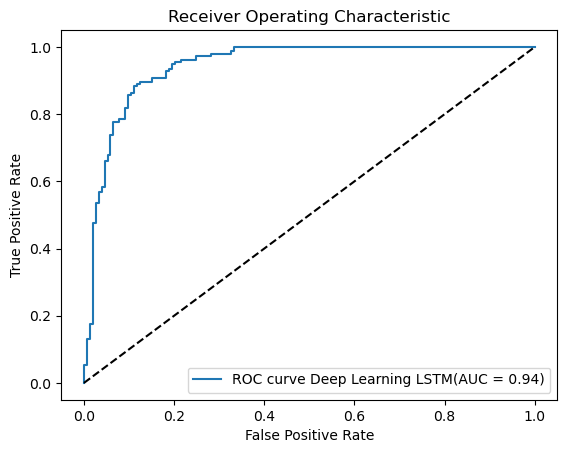

In [34]:
fpr_deep, tpr_deep, thresholds_deep = roc_curve(y_test, deep_pred)
roc_auc_deep = auc(fpr_deep, tpr_deep)

plt.plot(fpr_deep, tpr_deep, label='ROC curve Deep Learning LSTM(AUC = %0.2f)' % roc_auc_deep)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

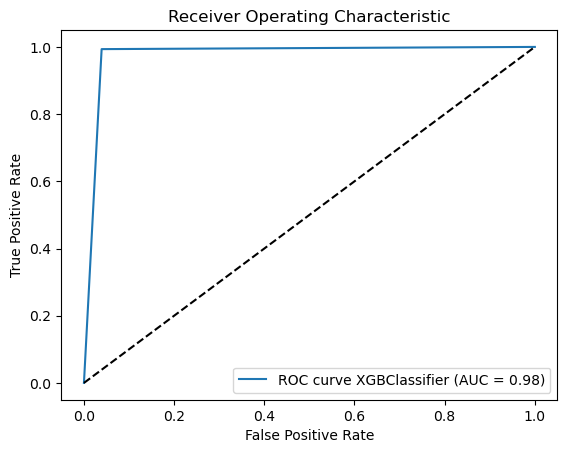

In [35]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_class_pred)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='ROC curve XGBClassifier (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

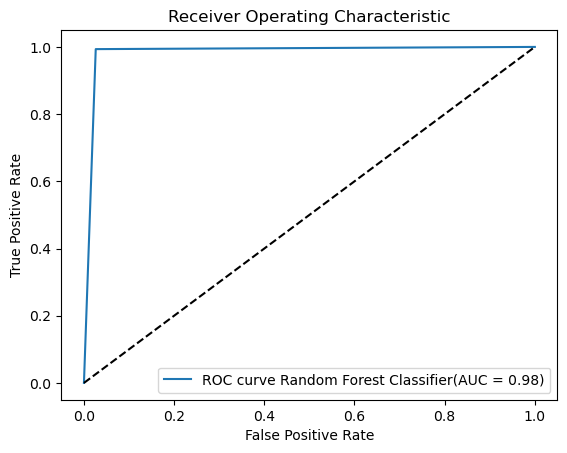

In [36]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_pred)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.plot(fpr_rfc, tpr_rfc, label='ROC curve Random Forest Classifier(AUC = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

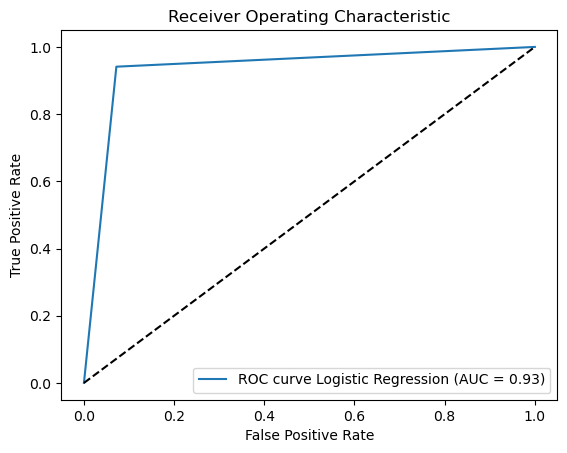

In [37]:
fpr_reg, tpr_reg, thresholds_reg = roc_curve(y_test, reg_pred)
roc_auc_reg = auc(fpr_reg, tpr_reg)

plt.plot(fpr_reg, tpr_reg, label='ROC curve Logistic Regression (AUC = %0.2f)' % roc_auc_reg)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

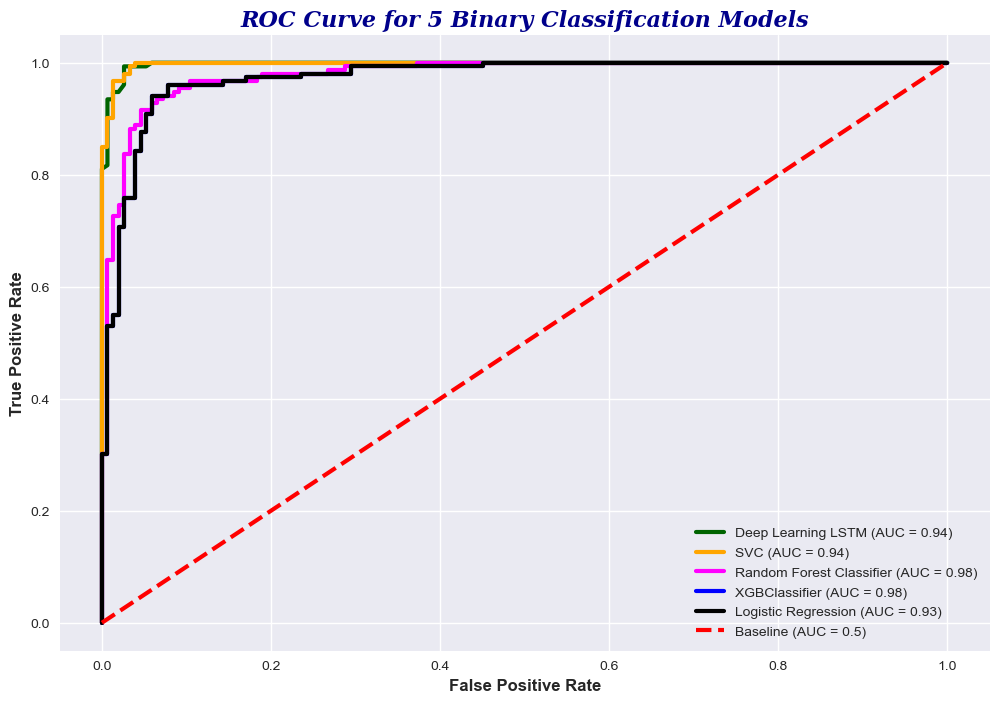

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(rfc, X_test, y_test, color='darkgreen', linewidth=3, ax=ax, label='Deep Learning LSTM (AUC = %0.2f)'% roc_auc_deep)
plot_roc_curve(xgb_class, X_test, y_test, color='orange', linewidth=3, ax=ax, label='SVC (AUC = %0.2f)'% roc_auc_svc)
plot_roc_curve(reg, X_test, y_test, color='magenta', linewidth=3, ax=ax, label='Random Forest Classifier (AUC = %0.2f)'% roc_auc_rfc)
plot_roc_curve(svc, X_test, y_test, color='blue', linewidth=3, ax=ax, label='XGBClassifier (AUC = %0.2f)' % roc_auc_xgb)
plot_roc_curve(svc, X_test, y_test, color='black', linewidth=3, ax=ax, label='Logistic Regression (AUC = %0.2f)' % roc_auc_reg)

plt.plot([0, 1], [0, 1], ls='--', color='red', linewidth=3, label='Baseline (AUC = 0.5)')
ax.legend(loc='lower right')
ax.set_title('ROC Curve for 5 Binary Classification Models', fontdict=font1)
ax.set_xlabel('False Positive Rate', fontdict=font2)
ax.set_ylabel('True Positive Rate', fontdict=font2)
plt.show()

In [40]:
test_pred_prob = xgb_class.predict_proba(test)[:, 1]

submission = pd.DataFrame({'Id': teste['Id'], 'class_0': 1 - test_pred_prob, 'class_1': test_pred_prob})

submission.to_csv('sample_submission.csv ', index=False)